# Steal Ling's data

In [1]:
import pandas as pd
import numpy as np

#For plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv('../Ling/AllData.csv')
data = data[data['mean']>0]
data.head()

,App_id,Name,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,...,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,SteamSpyOwnersNew,peak_max,peak_mean,max,mean
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,Dec 21 2017,0,0,1,0,86,11,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,56061000.0,3236027.0,1.038021e+06,1584886.77,470328.382800
1,730,Counter-Strike: Global Offensive,Aug 21 2012,0,0,1,0,83,8,1,...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,83851000.0,1305714.0,5.562232e+05,857604.22,316635.260189
2,570,Dota 2,Jul 9 2013,0,0,1,0,90,4,0,...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,174686000.0,1291328.0,7.820687e+05,709178.26,452757.727453
3,1091500,Cyberpunk 2077,Dec 9 2020,17,0,1,0,85,12,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,16006000.0,830387.0,2.302768e+05,332395.65,93077.502000
4,377160,Fallout 4,Nov 9 2015,17,0,1,7,84,10,1,...,Recommended:OS: Windows 7/8/10 (64-bit OS requ...,,,,,6343000.0,471955.0,4.275848e+04,226297.83,22651.106970


In [3]:
data.columns

Index(['App_id', 'Name', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'Genr

# Data Preprocessing: Independent Variables (X) vs Popularity Class (y)

In [4]:
proc_data = data.drop(['App_id','Name','ReleaseDate','Metacritic','SteamSpyOwners', 'SteamSpyOwnersVariance',
                      'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'PriceCurrency','SupportEmail', 
                      'SupportURL', 'AboutText','Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice',
                      'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews','RecommendationCount',
                      'SupportedLanguages', 'Website', 'PCMinReqsText', 'PCRecReqsText',
                      'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText','MacRecReqsText',
                      'SteamSpyOwnersNew', 'peak_max', 'peak_mean', 'max'],axis=1)

In [5]:
proc_data.columns.values

array(['RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
       'MovieCount', 'PackageCount', 'PublisherCount', 'ScreenshotCount',
       'AchievementCount', 'AchievementHighlightedCount',
       'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux',
       'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
       'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
       'MacReqsHaveRec', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
       'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor',
       'CategoryVRSupport', 'GenreIsNonGame', 'GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'PriceInitial',
       'PriceFinal', 'mean']

In [9]:
def create_grades(s):
    
    arr=-1*np.ones(s.shape)
    for i in range(len(s)):
        if s[i]>=250:
            arr[i]=1
        elif s[i]<2:
            arr[i]=0
            
    return pd.Series(arr)

proc_data['grade']=create_grades(proc_data['mean'])
proc_data.shape

(8823, 49)

In [10]:
data_for_classification=proc_data[(proc_data['grade']==0)|(proc_data['grade']==1)]

In [11]:
data_for_classification.shape

(2314, 49)

In [12]:
print(len(data_for_classification[data_for_classification['grade']==1]))
print(len(data_for_classification[data_for_classification['grade']==0]))

1054
1260


In [13]:
X=data_for_classification.drop(['mean','grade'],axis=1).copy()
X=X.astype(float)
X.head(10)

,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,PublisherCount,ScreenshotCount,AchievementCount,AchievementHighlightedCount,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal
0,0.0,0.0,1.0,0.0,11.0,1.0,1.0,30.0,37.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.99,29.99
1,0.0,0.0,1.0,0.0,8.0,1.0,1.0,15.0,167.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.99,14.99
2,0.0,0.0,1.0,0.0,4.0,0.0,1.0,16.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00
3,17.0,0.0,1.0,0.0,12.0,1.0,1.0,11.0,44.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.99,59.99
4,17.0,0.0,1.0,7.0,10.0,1.0,1.0,22.0,84.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.99,59.99
5,0.0,0.0,1.0,0.0,4.0,1.0,1.0,18.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19.99,19.99
6,17.0,0.0,1.0,0.0,9.0,7.0,1.0,24.0,69.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.99,59.99
7,0.0,0.0,1.0,200.0,7.0,2.0,1.0,8.0,100.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.99,29.99
8,0.0,0.0,1.0,8.0,3.0,3.0,1.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.99,4.99
9,0.0,0.0,1.0,4.0,2.0,5.0,1.0,5.0,23.0,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00


In [14]:
y=data_for_classification['grade'].copy()
y.value_counts()

0.0    1260
1.0    1054
Name: grade, dtype: int64

# K-nearest neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 42, 
                                                    shuffle=True,
                                                    stratify=y)

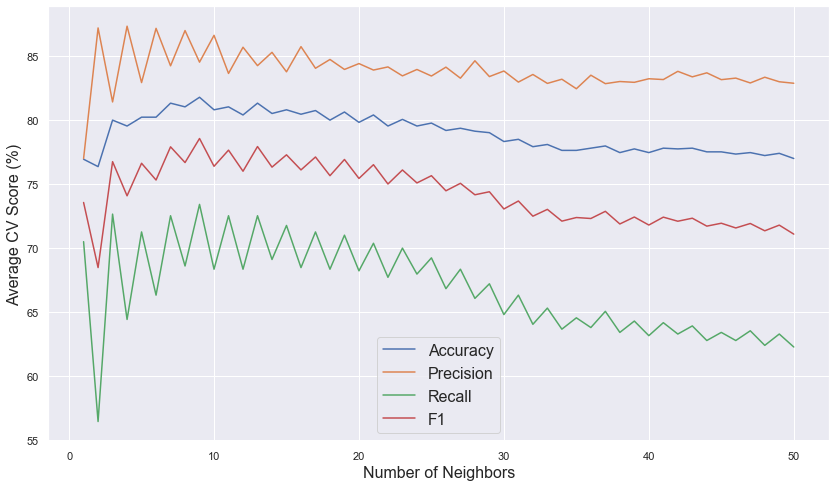

In [17]:
kfold = StratifiedKFold(5,shuffle = True,random_state = 42)

max_neighbors = 50

accs = np.zeros((5,max_neighbors))
prec = np.zeros((5,max_neighbors))
recs = np.zeros((5,max_neighbors))
f1s = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0

for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        
        #predict
        y_pred = knn.predict(X_train_test)
        
        #measure accuracy/precision/recall
        accs[j,i-1] = accuracy_score(y_train_test,y_pred)
        prec[j,i-1] = precision_score(y_train_test,y_pred)
        recs[j,i-1] = recall_score(y_train_test,y_pred)
        f1s[j,i-1] = f1_score(y_train_test,y_pred)
        
    j=j+1
    
plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0),label='Accuracy')
plt.plot(range(1,max_neighbors+1), 100*np.mean(prec, axis=0),label='Precision')
plt.plot(range(1,max_neighbors+1), 100*np.mean(recs, axis=0),label='Recall')
plt.plot(range(1,max_neighbors+1), 100*np.mean(f1s, axis=0),label='F1')

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Score (%)", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [18]:
# Best accuracy:
knn_best_acc,knn_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
knn_best_prec,knn_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
knn_best_rec,knn_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
knn_best_f1,knn_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [20]:
print('max accuracy:',np.round(knn_best_acc,2),'index:',knn_best_acc_index)
print()
print('max precision:',np.round(knn_best_prec,2),'index:',knn_best_prec_index)
print()
print('max recall:',np.round(knn_best_rec,2),'index:',knn_best_rec_index)
print()
print('max f1-score:',np.round(knn_best_f1,2),'index:',knn_best_f1_index)
print()

max accuracy: 81.79 index: 8

max precision: 87.34 index: 3

max recall: 73.42 index: 8

max f1-score: 78.57 index: 8



In [22]:
knn = KNeighborsClassifier(n_neighbors = knn_best_acc_index+1)

knn.fit(X_train,y_train.ravel())

y_pred = knn.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 79.97
test precision: 82.74
test recall: 70.83
test f1-score: 76.33


# k-nearest neighbors gives a test set Accuracy of 80%, Precision of 83%, Recall of 71%, and F1-score of 76%

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[276,  39],
       [ 77, 187]])

In [24]:
from sklearn.metrics import roc_curve

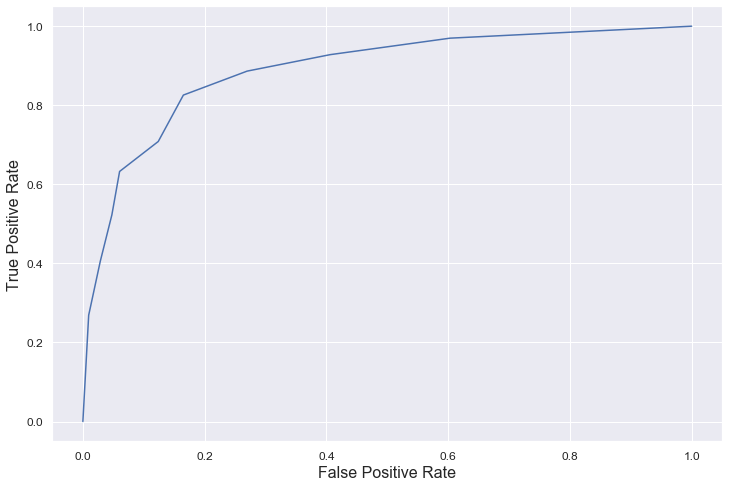

In [25]:
probs = knn.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

np.round(100*roc_auc_score(y_test,probs[:,1]),2)

88.92

### AUC score is 89%

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
kfold = StratifiedKFold(5,shuffle=True,random_state=42)

cutoffs = np.arange(0,1,.01)

accs = np.zeros((5,len(cutoffs)))
prec = np.zeros((5,len(cutoffs)))
recs = np.zeros((5,len(cutoffs)))
f1s = np.zeros((5,len(cutoffs)))

log_reg = LogisticRegression(class_weight='balanced')

i = 0
for train_index,test_index in kfold.split(X_train,y_train):
    X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

    for j in range(len(cutoffs)):

        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs[i,j] = accuracy_score(y_train_test,y_pred)
        prec[i,j] = precision_score(y_train_test,y_pred)
        recs[i,j] = recall_score(y_train_test,y_pred)
        f1s[i,j] = f1_score(y_train_test,y_pred)

    i=i+1

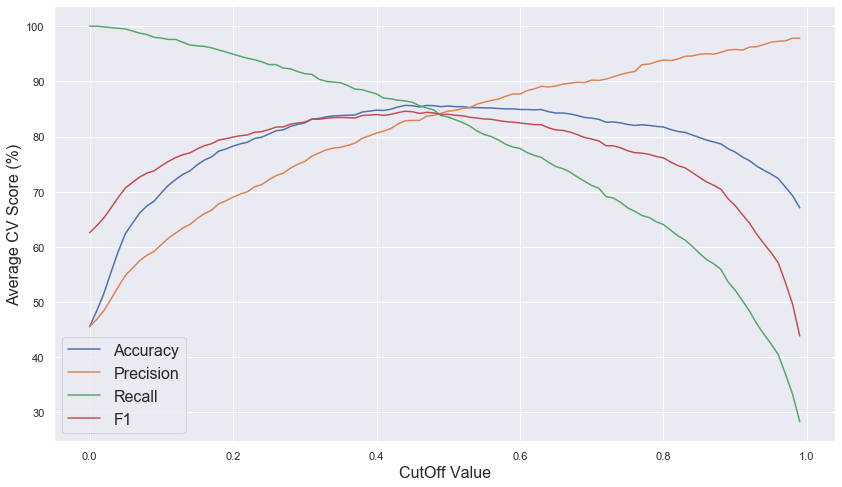

In [69]:
plt.figure(figsize=(14,8))

plt.plot(cutoffs, 100*np.mean(accs, axis=0),label='Accuracy')
plt.plot(cutoffs, 100*np.mean(prec, axis=0),label='Precision')
plt.plot(cutoffs, 100*np.mean(recs, axis=0),label='Recall')
plt.plot(cutoffs, 100*np.mean(f1s, axis=0),label='F1')

plt.xlabel("CutOff Value", fontsize=16)
plt.ylabel("Average CV Score (%)", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [70]:
print("The cutoff with highest mean CV accuracy was",
         cutoffs[np.argmax(np.mean(accs,axis=0))])
print("The cutoff with highest mean CV precision was",
         cutoffs[np.argmax(np.mean(prec,axis=0))])
print("The cutoff with highest mean CV recall was",
         cutoffs[np.argmax(np.mean(recs,axis=0))])
print("The cutoff with highest mean CV F1 score was",
         cutoffs[np.argmax(np.mean(f1s,axis=0))])

The cutoff with highest mean CV accuracy was 0.44
The cutoff with highest mean CV precision was 0.98
The cutoff with highest mean CV recall was 0.0
The cutoff with highest mean CV F1 score was 0.44


In [71]:
log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train,y_train)
probs = log_reg.predict_proba(X_test)[:,1]

#Choose cutoff with highest training set accuracy and F-1 score
y_pred = 1*(probs > 0.44)

print('Test set Accuracy: ',np.round(100*accuracy_score(y_test,y_pred),2))
print('Test set Precision: ',np.round(100*precision_score(y_test,y_pred),2))
print('Test set Recall: ',np.round(100*recall_score(y_test,y_pred),2))
print('Test set F1-score: ',np.round(100*f1_score(y_test,y_pred),2))

Test set Accuracy:  86.53
Test set Precision:  83.21
Test set Recall:  88.26
Test set F1-score:  85.66


# Logistic Regression gives a test set Accuracy of 86%, Precision of 83%, Recall of 88%, and F1-score of 85%

In [72]:
confusion_matrix(y_test,y_pred)

array([[268,  47],
       [ 31, 233]])

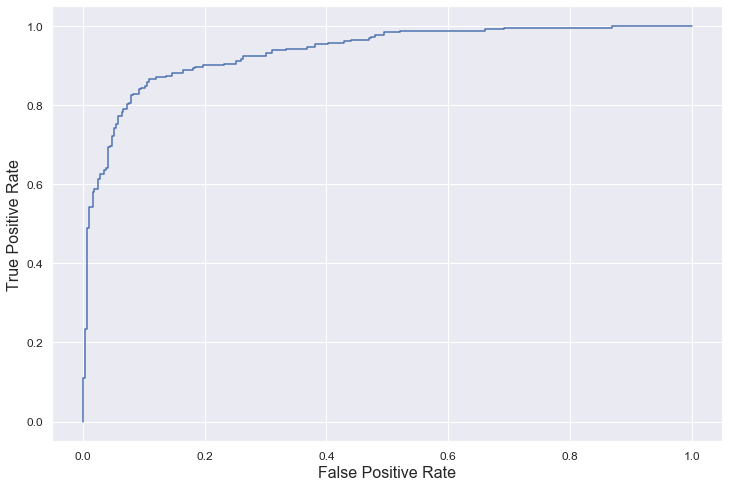

In [73]:
probs = log_reg.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [74]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

93.52

### AUC score is 93.5%

# Support Vector Machine

In [75]:
from sklearn.svm import SVC

In [78]:
svc = SVC(C=1)

svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
import warnings
warnings.filterwarnings('ignore')

kfold = StratifiedKFold(5,shuffle=True,random_state=42)

cutoffs = np.arange(0,1,.01)

accs = np.zeros((5,len(cutoffs)))
prec = np.zeros((5,len(cutoffs)))
recs = np.zeros((5,len(cutoffs)))
f1s = np.zeros((5,len(cutoffs)))

svc = SVC(probability=True)

i = 0
for train_index,test_index in kfold.split(X_train,y_train):
    X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

    for j in range(len(cutoffs)):

        svc_clone = clone(svc)
        svc_clone.fit(X_train_train,y_train_train)
        probs = svc_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs[i,j] = accuracy_score(y_train_test,y_pred)
        prec[i,j] = precision_score(y_train_test,y_pred)
        recs[i,j] = recall_score(y_train_test,y_pred)
        f1s[i,j] = f1_score(y_train_test,y_pred)

    i=i+1

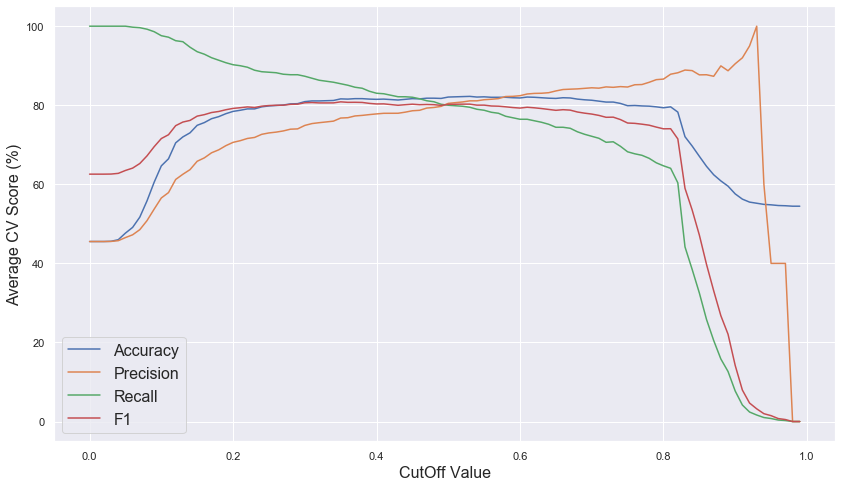

In [92]:
plt.figure(figsize=(14,8))

plt.plot(cutoffs, 100*np.mean(accs, axis=0),label='Accuracy')
plt.plot(cutoffs, 100*np.mean(prec, axis=0),label='Precision')
plt.plot(cutoffs, 100*np.mean(recs, axis=0),label='Recall')
plt.plot(cutoffs, 100*np.mean(f1s, axis=0),label='F1')

plt.xlabel("CutOff Value", fontsize=16)
plt.ylabel("Average CV Score (%)", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [93]:
print("The cutoff with highest mean CV accuracy was",
         cutoffs[np.argmax(np.mean(accs,axis=0))])
print("The cutoff with highest mean CV precision was",
         cutoffs[np.argmax(np.mean(prec,axis=0))])
print("The cutoff with highest mean CV recall was",
         cutoffs[np.argmax(np.mean(recs,axis=0))])
print("The cutoff with highest mean CV F1 score was",
         cutoffs[np.argmax(np.mean(f1s,axis=0))])

The cutoff with highest mean CV accuracy was 0.53
The cutoff with highest mean CV precision was 0.93
The cutoff with highest mean CV recall was 0.0
The cutoff with highest mean CV F1 score was 0.35000000000000003


In [94]:
svc = SVC(probability=True)

svc.fit(X_train,y_train)
probs = svc.predict_proba(X_test)[:,1]

#Choose cutoff with highest training set accuracy
y_pred = 1*(probs > 0.53)

print('Test set Accuracy: ',np.round(100*accuracy_score(y_test,y_pred),2))
print('Test set Precision: ',np.round(100*precision_score(y_test,y_pred),2))
print('Test set Recall: ',np.round(100*recall_score(y_test,y_pred),2))
print('Test set F1-score: ',np.round(100*f1_score(y_test,y_pred),2))

Test set Accuracy:  83.94
Test set Precision:  82.26
Test set Recall:  82.58
Test set F1-score:  82.42


# Support Vector Machine gives a test set Accuracy of 84%, Precision of 82%, Recall of 83%, and F1-score of 82%

In [96]:
confusion_matrix(y_test,y_pred)

array([[252,  63],
       [ 36, 228]])

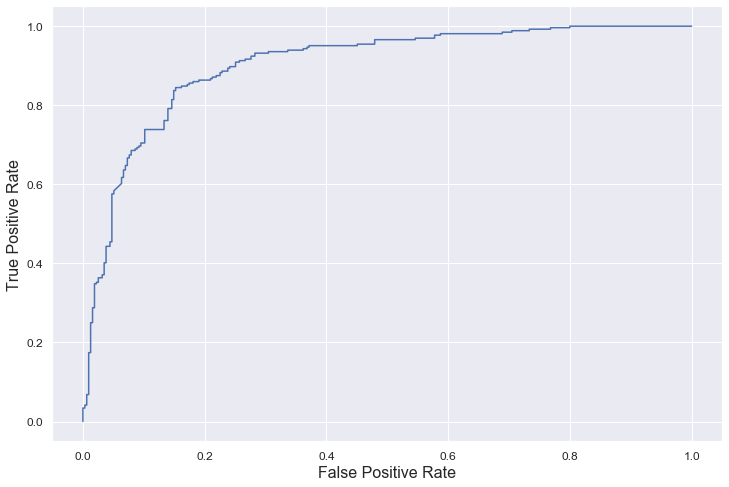

In [97]:
probs = svc.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [98]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

90.23

### AUC score is 90%

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# n will be the maximum max_depth I consider
n = 50

accs = np.zeros((5,n))
prec = np.zeros((5,n))
recs = np.zeros((5,n))
f1s = np.zeros((5,n))

for j in range(1,n+1):
    if j%10==0:
        print(j)
    
    tree = DecisionTreeClassifier(max_depth=j, random_state = 42)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        prec[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        f1s[i,j-1] = f1_score(y_train_test,y_predict)

        i = i + 1

10
20
30
40
50


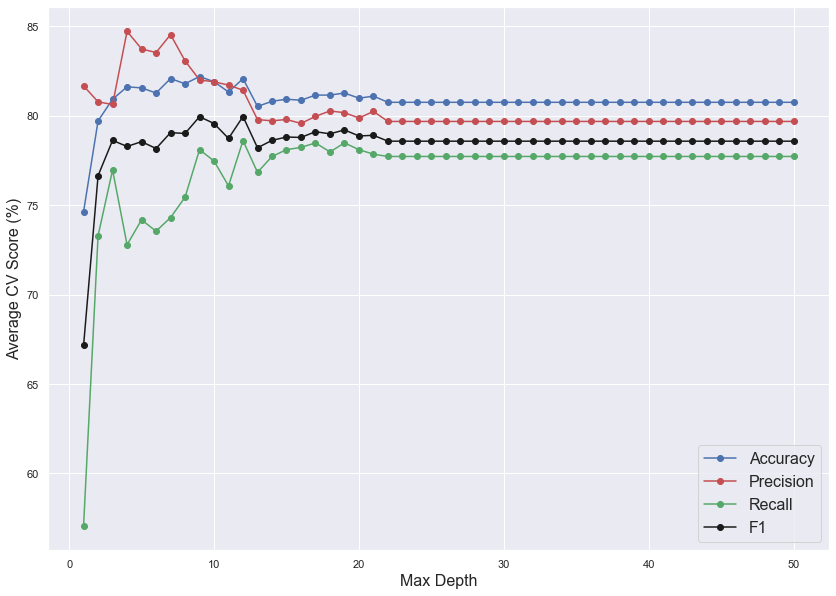

In [48]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), 100*np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), 100*np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), 100*np.mean(recs,axis=0),'g-o', label="Recall")
plt.plot(range(1,n+1), 100*np.mean(f1s,axis=0),'k-o', label="F1")

plt.ylabel("Average CV Score (%)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [49]:
# Best accuracy:
tree_best_acc,tree_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
tree_best_prec,tree_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
tree_best_rec,tree_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
tree_best_f1,tree_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [50]:
print('max accuracy:',np.round(tree_best_acc,2),'index:',tree_best_acc_index)
print()
print('max precision:',np.round(tree_best_prec,2),'index:',tree_best_prec_index)
print()
print('max recall:',np.round(tree_best_rec,2),'index:',tree_best_rec_index)
print()
print('max f1-score:',np.round(tree_best_f1,2),'index:',tree_best_f1_index)
print()

max accuracy: 82.19 index: 8

max precision: 84.72 index: 3

max recall: 78.61 index: 11

max f1-score: 79.95 index: 11



In [51]:
tree = DecisionTreeClassifier(max_depth=tree_best_f1_index+1, random_state = 42)

tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 81.87
test precision: 81.67
test recall: 77.65
test f1-score: 79.61


# Decision Tree gives a test set Accuracy of 82%, Precision of 82%, Recall of 77%, and F1-score of 80%

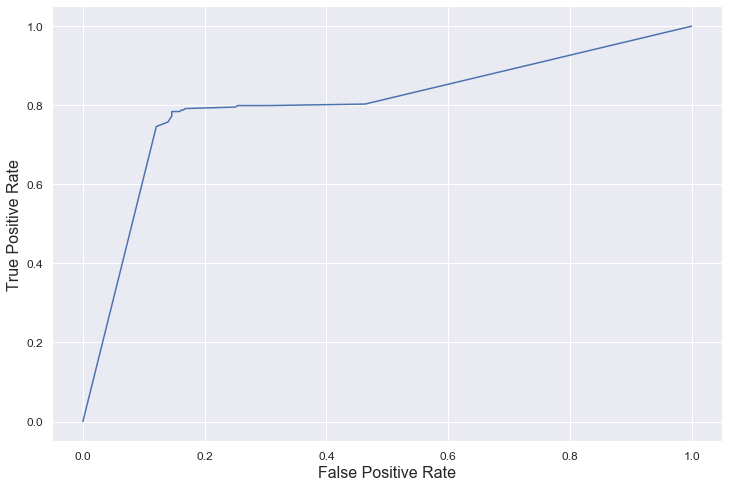

In [52]:
probs = tree.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [53]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

80.11

### AUC score is 80%

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# n will be the maximum max_depth I consider
n = 50

accs = np.zeros((5,n))
prec = np.zeros((5,n))
recs = np.zeros((5,n))
f1s = np.zeros((5,n))

for j in range(1,n+1):
    if j%10==0:
        print(j)
    
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 42)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        prec[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        f1s[i,j-1] = f1_score(y_train_test,y_predict)

        i = i + 1

10
20
30
40
50


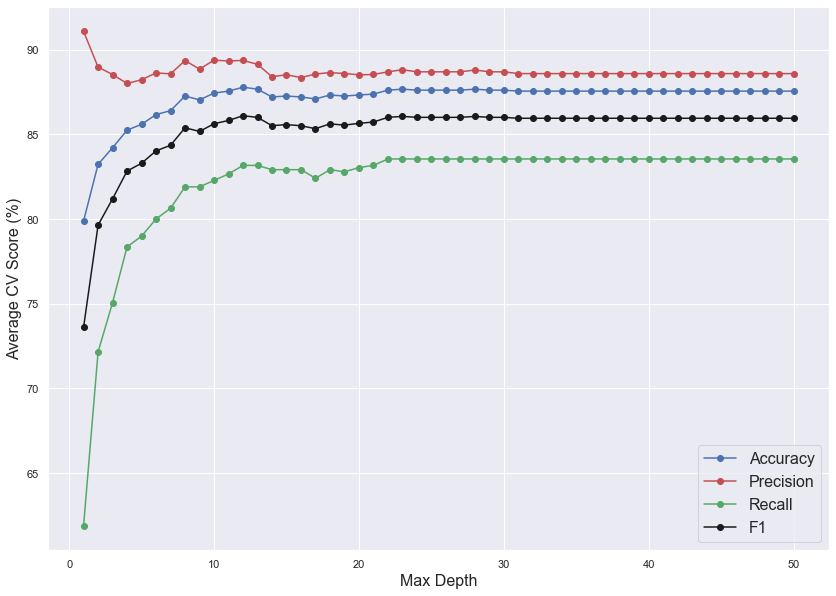

In [38]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), 100*np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), 100*np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), 100*np.mean(recs,axis=0),'g-o', label="Recall")
plt.plot(range(1,n+1), 100*np.mean(f1s,axis=0),'k-o', label="F1")

plt.ylabel("Average CV Score (%)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [39]:
# Best accuracy:
rf_best_acc,rf_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
rf_best_prec,rf_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
rf_best_rec,rf_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
rf_best_f1,rf_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [40]:
print('max accuracy:',np.round(rf_best_acc,2),'index:',rf_best_acc_index)
print()
print('max precision:',np.round(rf_best_prec,2),'index:',rf_best_prec_index)
print()
print('max recall:',np.round(rf_best_rec,2),'index:',rf_best_rec_index)
print()
print('max f1-score:',np.round(rf_best_f1,2),'index:',rf_best_f1_index)
print()

max accuracy: 87.78 index: 11

max precision: 91.08 index: 0

max recall: 83.54 index: 21

max f1-score: 86.1 index: 11



In [41]:
rf = RandomForestClassifier(n_estimators = 500,max_depth=rf_best_acc_index+1, random_state = 42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 89.64
test precision: 90.8
test recall: 85.98
test f1-score: 88.33


# Random Forest gives a best test set Accuracy of 90%, Precision of 91%, Recall of 86%, and F1-score of 88%

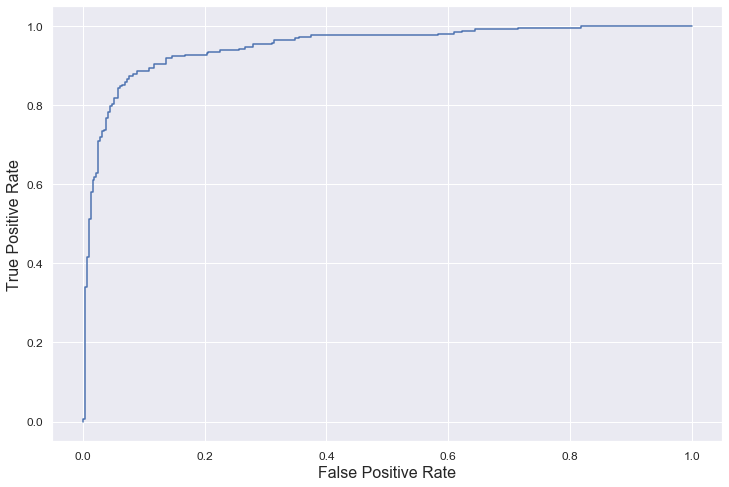

In [42]:
probs = rf.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [44]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

95.01

### AUC score is 95%

# AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# n will be the maximum max_depth I consider
n = 100

accs = np.zeros((5,n))
prec = np.zeros((5,n))
recs = np.zeros((5,n))
f1s = np.zeros((5,n))

for j in range(1,n+1):
    if j%10==0:
        print(j)
    # n_estimators controls how many weak learners we use
    # learning_rate is a hyperparameter that controls how
    # aggressively we correct incorrect labels
    # algorithm is the algorithm that sklearn runs to fit the model
    # SAMME.R or SAMME are the options, SAMME.R allows calculation
    # of probabilities.
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                n_estimators = j,
                algorithm="SAMME.R",
                learning_rate = 0.5
            )
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        ada_clf_clone = clone(ada_clf)
        ada_clf_clone.fit(X_train_train,y_train_train)
        
        y_predict = ada_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        prec[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        f1s[i,j-1] = f1_score(y_train_test,y_predict)

        i = i + 1

10
20
30
40
50
60
70
80
90
100


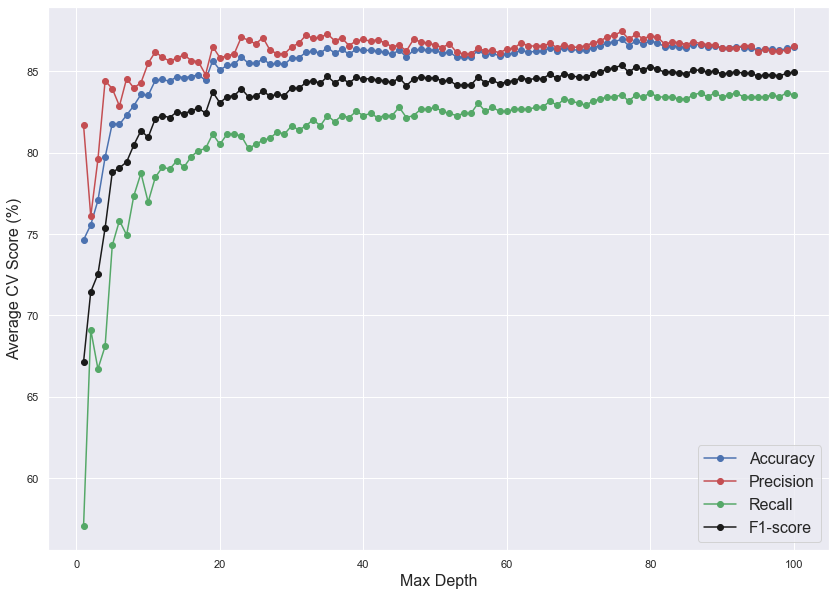

In [58]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), 100*np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), 100*np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), 100*np.mean(recs,axis=0),'g-o', label="Recall")
plt.plot(range(1,n+1), 100*np.mean(f1s,axis=0),'k-o', label="F1-score")

plt.ylabel("Average CV Score (%)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [60]:
# Best accuracy:
ada_best_acc,ada_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
ada_best_prec,ada_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
ada_best_rec,ada_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
ada_best_f1,ada_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [62]:
print('max accuracy:',np.round(ada_best_acc,2),'index:',ada_best_acc_index)
print()
print('max precision:',np.round(ada_best_prec,2),'index:',ada_best_prec_index)
print()
print('max recall:',np.round(ada_best_rec,2),'index:',ada_best_rec_index)
print()
print('max f1-score:',np.round(ada_best_f1,2),'index:',ada_best_f1_index)
print()

max accuracy: 86.97 index: 75

max precision: 87.45 index: 75

max recall: 83.67 index: 79

max f1-score: 85.38 index: 75



In [63]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                n_estimators = ada_best_acc_index+1,
                algorithm="SAMME.R",
                learning_rate = 0.5
            )

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 88.6
test precision: 89.92
test recall: 84.47
test f1-score: 87.11


# AdaBoost gives a test set Accuracy of 89%, Precision of 90%, Recall of 84%, and F1-score of 87%

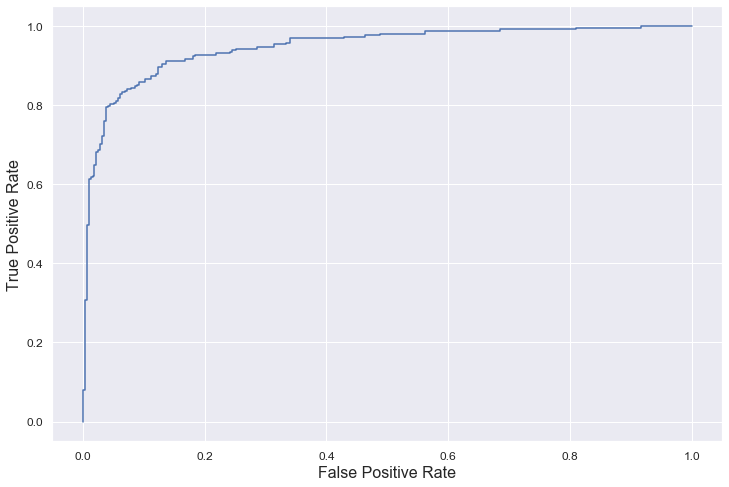

In [64]:
probs = ada.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [65]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

94.75

### AUC score is 95%

In [172]:
# Don't run cells below

In [ ]:
# Commented just in case

In [9]:
# #standard: a column name used to rank the games
# #ranks: a list of rank cutoffs

# def grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=(12,12)):
       
#     grade = list(range(1,len(ranks)+1))
#     a = np.array(ranks[1:]+[len(data)] ) - np.array( [0] + ranks[1:])
#     grades = []
#     for i in range(len(grade)):
#         grades.append( [grade[i]]*a[i] )    
#     grades = list(chain(*grades))
    
#     # Sort data according to the 'standard'
#     data_copy=data.copy()
#     data_copy.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
#     avg_graded = data_copy#.loc[data[standard]>=1].copy()

#     # Rank the games
#     if plot_cutoff:
#         print('Using '+str(standard)+' :')
#         for i in ranks:
#             print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

#     cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
#     #counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
#     #print(counts)

#     #avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
#     avg_graded['Grade'] = grades

#     data_clean = avg_graded[[#'ReleaseDate', 
#         'CategorySinglePlayer',
#        'CategoryMultiplayer', 
#        'GenreIsIndie', 
#                          'GenreIsAction', 
#                          'GenreIsAdventure', 
#                          'GenreIsCasual',
#        'GenreIsStrategy', 
#                          'GenreIsRPG', 
#                          'GenreIsSimulation','Grade']]

# #threshold = .2
# #data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

#     data_clean.columns = ['Single', 'Multi', 'Indie',
#        'Action', 'Adventure', 'Casual', 'Strategy',
#        'RPG', 'Simulation', 'Grade']

#     data_test = {}
#     for i in grade:
#         data_test[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
        
#     if plot_figures:
#         plt.figure(figsize=fig_size)
#         for i in grade:
#             plt.plot(data_test[i].columns,data_test[i].mean(),label='Grade '+str(i))

#         plt.legend()
#         plt.title('By max of Avg_players')
#         plt.show()
#     return data_test

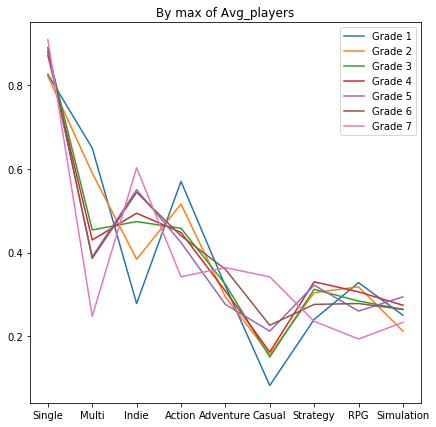

In [10]:
# fig_size=(7,7)
# ranks = list(np.arange(0,3500,500))
# data_max = grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=fig_size)

In [103]:
# import dataframe_image as dfi

In [107]:
# len(data_for_classification.columns.values)

27

In [108]:
# data_for_classification[data_for_classification.columns.values[:13]].head().style.background_gradient()

,ControllerSupport,IsFree,PurchaseAvail,PlatformLinux,PlatformMac,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop
0,0,0,1,0,0,1,1,1,1,1,0,1,0
1,1,0,1,1,1,0,1,0,1,0,0,1,0
2,0,1,0,1,1,0,1,0,1,0,0,1,1
3,0,0,1,0,0,1,1,1,1,1,1,0,0
4,1,0,1,0,0,1,0,0,0,0,1,0,0


In [123]:
# target_for_classification[::2500]

0        4.0
2500     2.0
5000     1.0
7500     1.0
10000    1.0
dtype: float64

In [109]:
# dfi.export(data_for_classification[data_for_classification.columns.values[:13]].head().style.background_gradient(),
#            'Forppt-features-1.png')
# dfi.export(data_for_classification[data_for_classification.columns.values[13:]].head().style.background_gradient(),
#            'Forppt-features-2.png')

In [144]:
# def create_grades_words(s):
    
# #     arr=np.ones(s.shape)
    
#     arr=[]
    
#     for i in range(len(s)):
#         if s[i]>=10000:
#             arr.append('Very High')
#         elif 1000<=s[i]<10000:
#             arr.append('High')
#         elif 100<=s[i]<1000:
#             arr.append('Low')
#         else:
#             arr.append('Very Low')
#     return pd.Series(arr)

In [145]:
# target_grade=create_grades_words(proc_data['mean'])
# target_grade.unique()

array(['Very High', 'High', 'Low', 'Very Low'], dtype=object)

In [156]:
# df_target=(pd.DataFrame({'Avg Players':proc_data['mean'],
#                'Popularity':target_grade,
#                'Target':target_for_classification})
#  .sample(6,random_state=1))

In [157]:
# dfi.export(df_target,'Forppt-target.png')

In [158]:
# df_target

,Avg Players,Popularity,Target
286,1476.258551,High,3.0
674,108.969032,Low,2.0
7534,1.058182,Very Low,1.0
6434,5.046552,Very Low,1.0
1141,191.872500,Low,2.0
9777,0.000000,Very Low,1.0


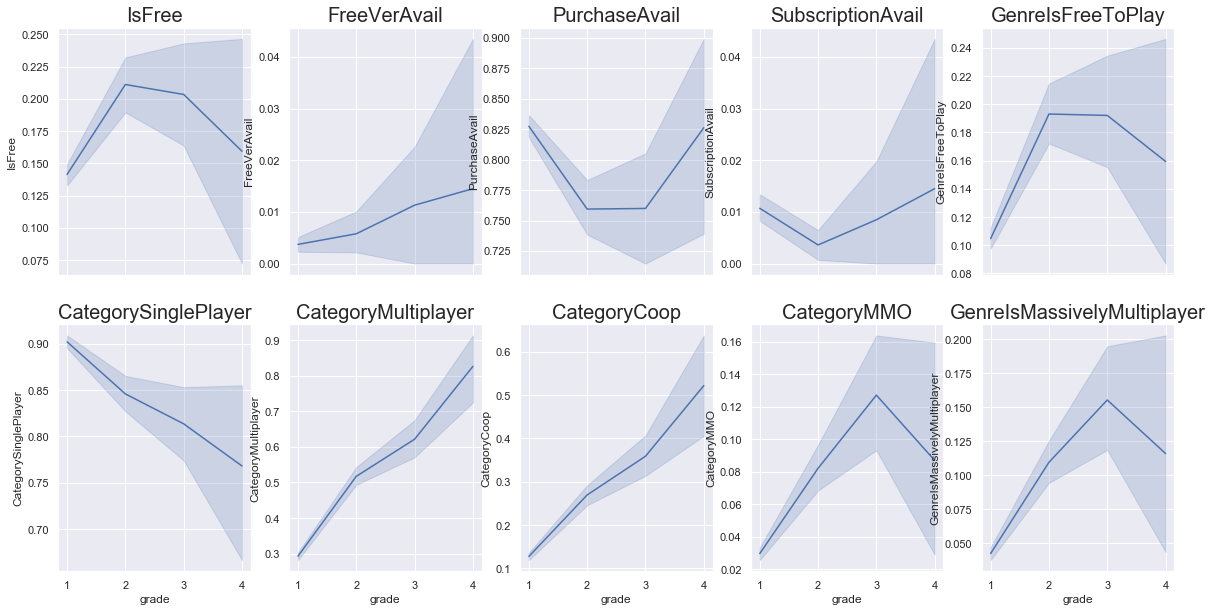

In [214]:
# nrows=2
# ncols=5
# fontsize=20
# target='grade'
# feat=['IsFree','FreeVerAvail','PurchaseAvail','SubscriptionAvail','GenreIsFreeToPlay',
#      'CategorySinglePlayer','CategoryMultiplayer','CategoryCoop','CategoryMMO','GenreIsMassivelyMultiplayer']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(20,10), sharex=True )

# # [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()


In [220]:
# len(proc_data.loc[(proc_data['mean']<100) & (proc_data['IsFree']==True)])/len(proc_data[proc_data['mean']<100])

0.1414717626925271

In [221]:
# len(proc_data.loc[(proc_data['mean']>10000) & (proc_data['IsFree']==True)])/len(proc_data[proc_data['mean']>10000])

0.15942028985507245

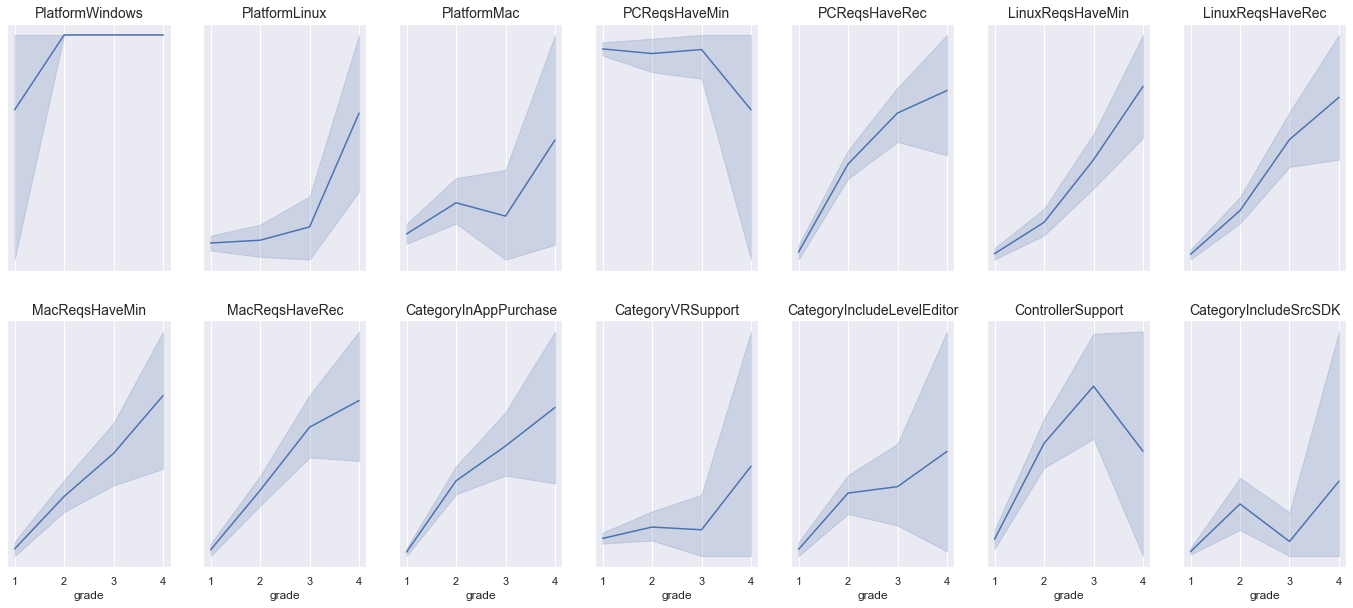

In [96]:
# nrows=2
# ncols=7
# fontsize=14
# target='grade'
# feat=['PlatformWindows','PlatformLinux','PlatformMac','PCReqsHaveMin','PCReqsHaveRec','LinuxReqsHaveMin',
#      'LinuxReqsHaveRec','MacReqsHaveMin','MacReqsHaveRec','CategoryInAppPurchase','CategoryVRSupport',
#      'CategoryIncludeLevelEditor','ControllerSupport','CategoryIncludeSrcSDK']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(24,10), sharex=True )

# [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()

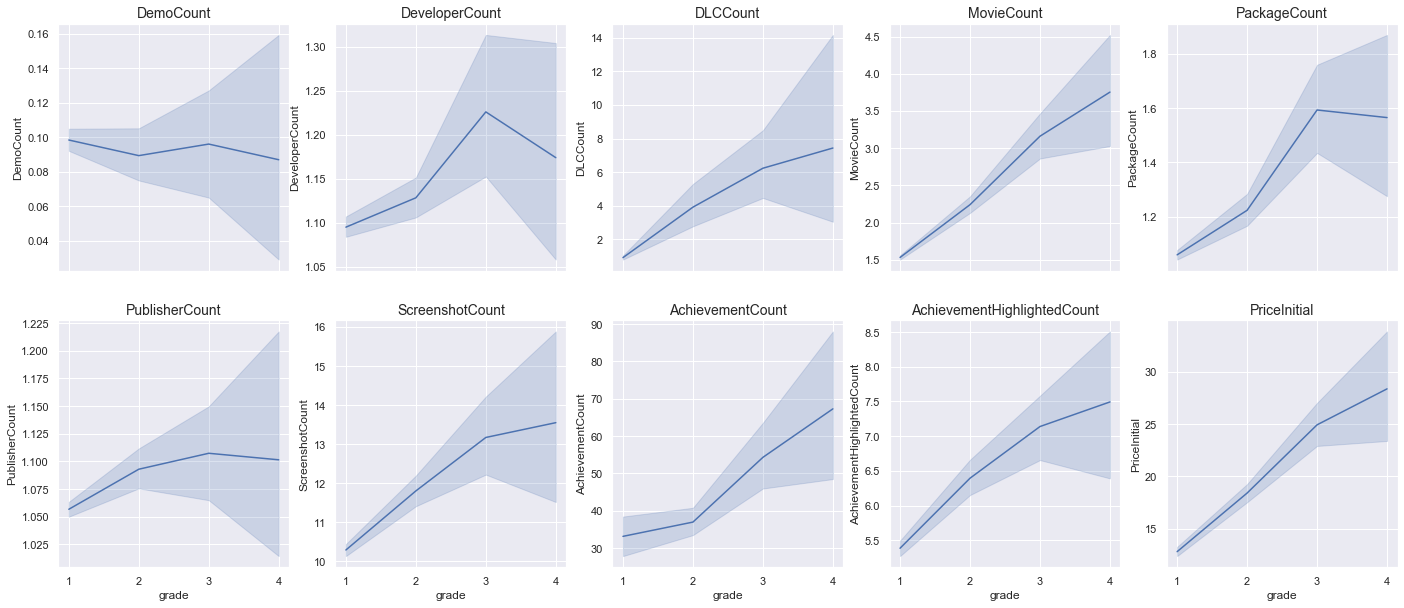

In [271]:
# nrows=2
# ncols=5
# fontsize=14
# target='grade'
# feat=['DemoCount','DeveloperCount','DLCCount','MovieCount','PackageCount','PublisherCount',
#      'ScreenshotCount','AchievementCount','AchievementHighlightedCount','PriceInitial']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(24,10), sharex=True )

# # [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()

In [314]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==0)])/len(proc_data[proc_data['grade']==g])

0.391304347826087

In [315]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==1)])/len(proc_data[proc_data['grade']==g])

0.18840579710144928

In [316]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==2)])/len(proc_data[proc_data['grade']==g])

0.043478260869565216

In [317]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==460)])/len(proc_data[proc_data['grade']==g])

0.0

In [318]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==630)])/len(proc_data[proc_data['grade']==g])

0.0

IndexError: list index out of range

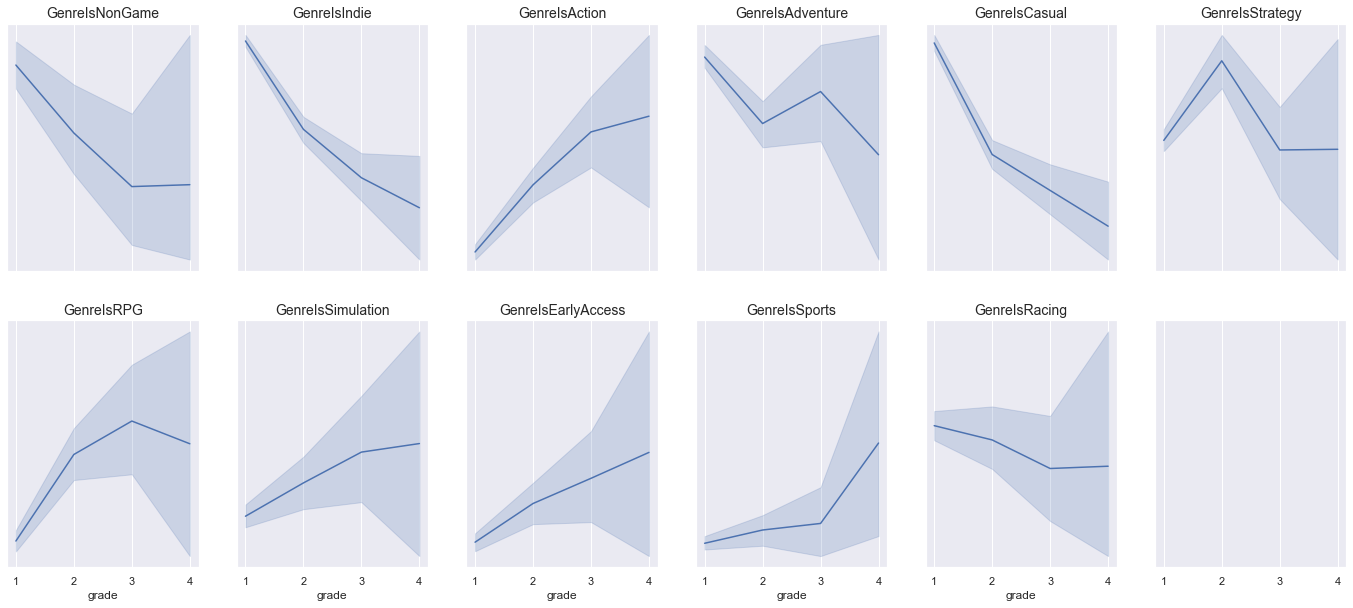

In [99]:
# nrows=2
# ncols=6
# fontsize=14
# target='grade'
# feat=['GenreIsNonGame','GenreIsIndie','GenreIsAction','GenreIsAdventure','GenreIsCasual','GenreIsStrategy',
#      'GenreIsRPG','GenreIsSimulation','GenreIsEarlyAccess','GenreIsSports','GenreIsRacing']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(24,10), sharex=True )

# [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()

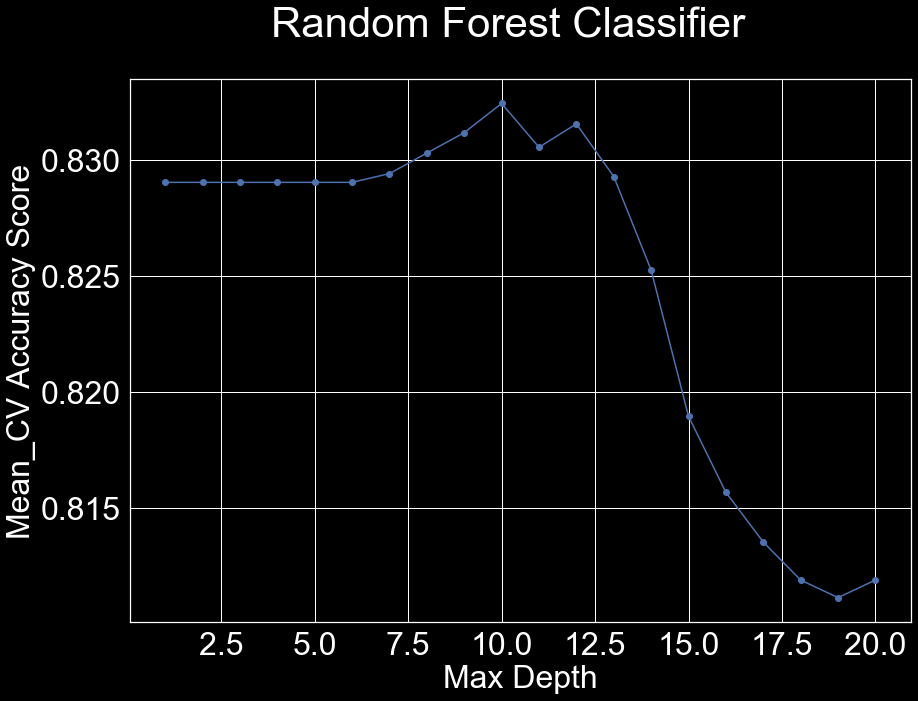

In [95]:
# plt.figure(figsize=(14,10))

# fontsize=32

# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# plt.suptitle('Random Forest Classifier',fontsize=fontsize+10,color='white')
# plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")

# plt.ylabel("Mean_CV Accuracy Score",fontsize=fontsize,color='white')
# plt.xlabel("Max Depth",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize,color='white')
# plt.yticks(fontsize=fontsize,color='white')

# # plt.legend(fontsize=fontsize)
# plt.savefig('ForPPT-RandomForest-gradevscategorical.jpg', facecolor=f.get_facecolor(), transparent=True,bbox_inches = 'tight')
# plt.show()

In [76]:
# names = []
# scores = []
# for name, score in zip(X_test.columns,rf_clone.feature_importances_):
#     names.append(name)
#     scores.append(np.round(score,4))
    
# score_df = pd.DataFrame({'feature':names,'importance_score':scores})

# score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
11,CategoryMultiplayer,0.0822
15,GenreIsIndie,0.0805
12,CategoryCoop,0.0600
14,CategoryInAppPurchase,0.0554
0,ControllerSupport,0.0510
18,GenreIsCasual,0.0475
16,GenreIsAction,0.0449
20,GenreIsRPG,0.0448
19,GenreIsStrategy,0.0430
17,GenreIsAdventure,0.0415


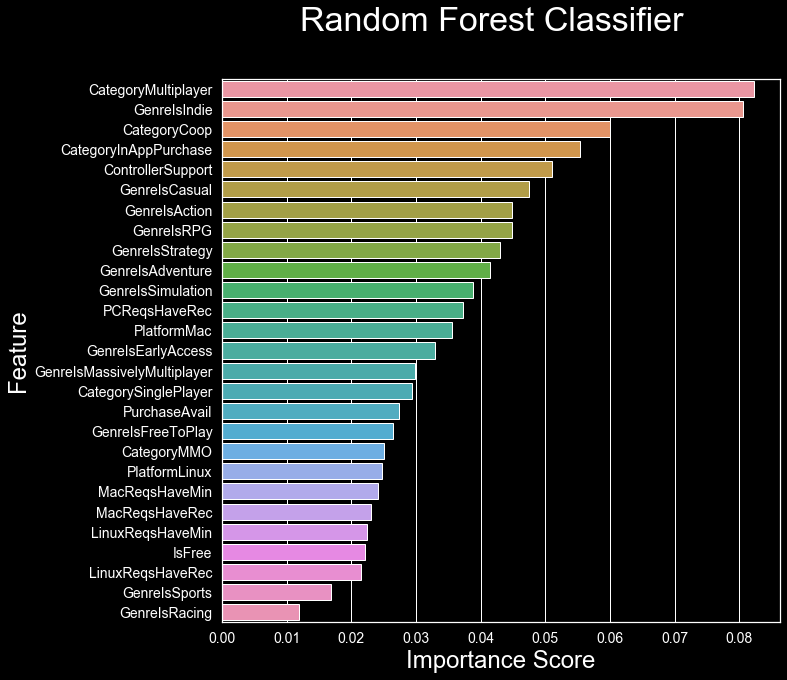

In [96]:
# f,ax = plt.subplots(figsize=(10,10))

# fontsize=24
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# plt.suptitle('Random Forest Classifier',fontsize=fontsize+10,color='white')
# sns.barplot(x="importance_score", y="feature", data=score_df.sort_values('importance_score',ascending=False))

# plt.xlabel("Importance Score",fontsize=fontsize,color='white')
# plt.ylabel("Feature",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize-10,color='white')
# # plt.xscale('log')
# # plt.xlim(0.9,2000)

# plt.yticks(fontsize=fontsize-10,color='white')
# # plt.yscale('log')
# # plt.ylim(10**2.5,10**8.2)

# plt.savefig('ForPPT-RandomForest-gradevscategorical-featImp.jpg', 
#             facecolor=f.get_facecolor(), transparent=True,bbox_inches = 'tight')
# # plt.show()

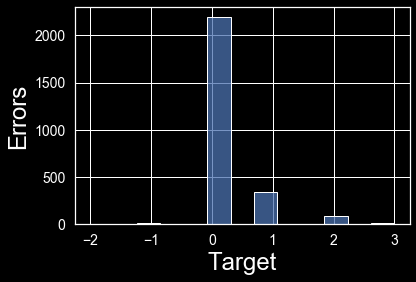

In [164]:
# resid=y_test-y_predict

# sns.histplot(resid)
# plt.xlabel("Target",fontsize=fontsize,color='white')
# plt.ylabel("Errors",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize-10,color='white')
# plt.yticks(fontsize=fontsize-10,color='white')
# plt.show()

# The RandomForest Classifier is pretty bad but results look cool nonetheless!

# Let's now try Voting

In [186]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# ## The VotingClassifier
# from sklearn.ensemble import VotingClassifier

# ## import accuracy metric
# from sklearn.metrics import accuracy_score

In [187]:
# log_clf = LogisticRegression()
# rf_clf = RandomForestClassifier()
# svm_clf = SVC()
# knn_clf = KNeighborsClassifier()

In [188]:
# voting_clf = VotingClassifier(
#                 [('lr',LogisticRegression()),
#                 ('rf',RandomForestClassifier()),
#                 ('svm',SVC()),
#                 ('knn',KNeighborsClassifier())],
#                 voting = "hard")

In [189]:
voting_clf.fit(X_train,y_train)

/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamm

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                  coef0=

In [190]:
# for name,clf in (["log_clf",log_clf],["rf_clf",rf_clf],
#                  ["svm_clf",svm_clf],["knn_clf",knn_clf],
#                  ["voting_clf",voting_clf]):
#     # fit the model
#     clf.fit(X_train,y_train)
    
#     # predict
#     y_pred = clf.predict(X_test)
    
#     # get acc
#     acc = sum(y_test == y_pred)/len(y_pred)
    
#     print(name, np.round(acc,5))

/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamm

log_clf 0.82024
rf_clf 0.80174
svm_clf 0.82893
knn_clf 0.80853


/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rohitpro/opt/anaconda3/envs/mytfenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamm

voting_clf 0.82742


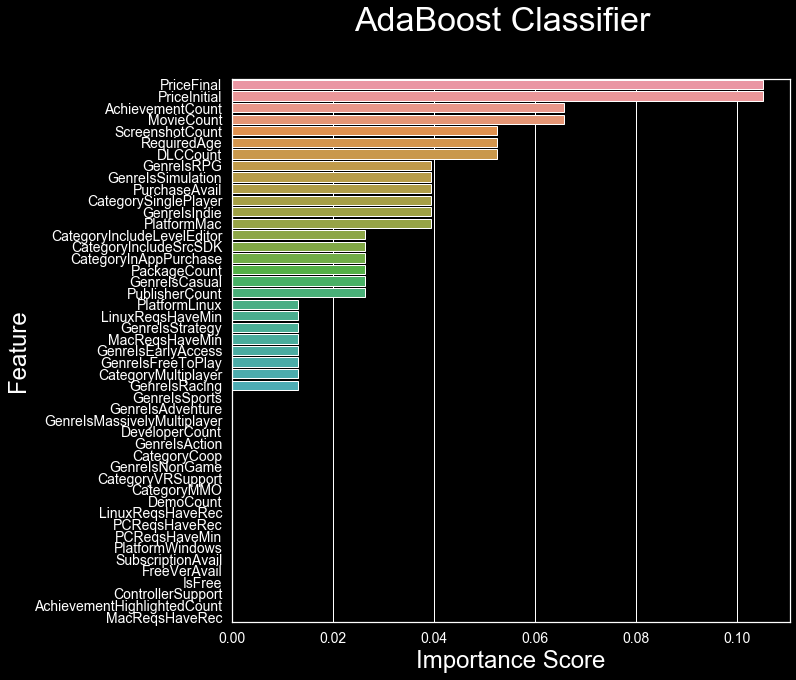

In [171]:
# names = []
# scores = []
# for name, score in zip(X_test.columns,ada.feature_importances_):
#     names.append(name)
#     scores.append(np.round(score,8))
    
# score_ada = pd.DataFrame({'feature':names,'importance_score':scores})

# score_ada.sort_values('importance_score',ascending=False)

# f,ax = plt.subplots(figsize=(10,10))

# fontsize=24
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# plt.suptitle('AdaBoost Classifier',fontsize=fontsize+10,color='white')
# sns.barplot(x="importance_score", y="feature", data=score_ada.sort_values('importance_score',ascending=False))

# plt.xlabel("Importance Score",fontsize=fontsize,color='white')
# plt.ylabel("Feature",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize-10,color='white')
# # plt.xscale('log')
# # plt.xlim(0.9,2000)

# plt.yticks(fontsize=fontsize-10,color='white')
# # plt.yscale('log')
# # plt.ylim(10**2.5,10**8.2)

# # plt.savefig('ForPPT-AdaBoost-gradevscategorical-featImp.jpg', 
# #             facecolor=f.get_facecolor(), transparent=True,bbox_inches = 'tight')
# plt.show()